In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt

# ----------------------------
# 1. Create Multi-Company Dataset
# ----------------------------
companies = ["HPQ"]
df_list = []

for stock in companies:
    df = yf.download(stock, period="55y", interval="1d")
    # Keep only 5 columns: Open, High, Low, Close, Volume
    df.dropna(inplace=True)
    df_list.append(df)

# Concatenate all company data into one DataFrame
data = pd.concat(df_list, ignore_index=True )



/tmp/ipython-input-3449286500.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, period="55y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [73]:
data.shape[0]


13868

In [74]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,HPQ,HPQ,HPQ,HPQ,HPQ
0,0.054124,0.054124,0.053532,0.053532,2508518
1,0.052941,0.054124,0.052054,0.054124,1747507
2,0.052054,0.053532,0.052054,0.052941,507341
3,0.049983,0.051758,0.049983,0.051758,1056960
4,0.047026,0.049983,0.047026,0.049983,2240755


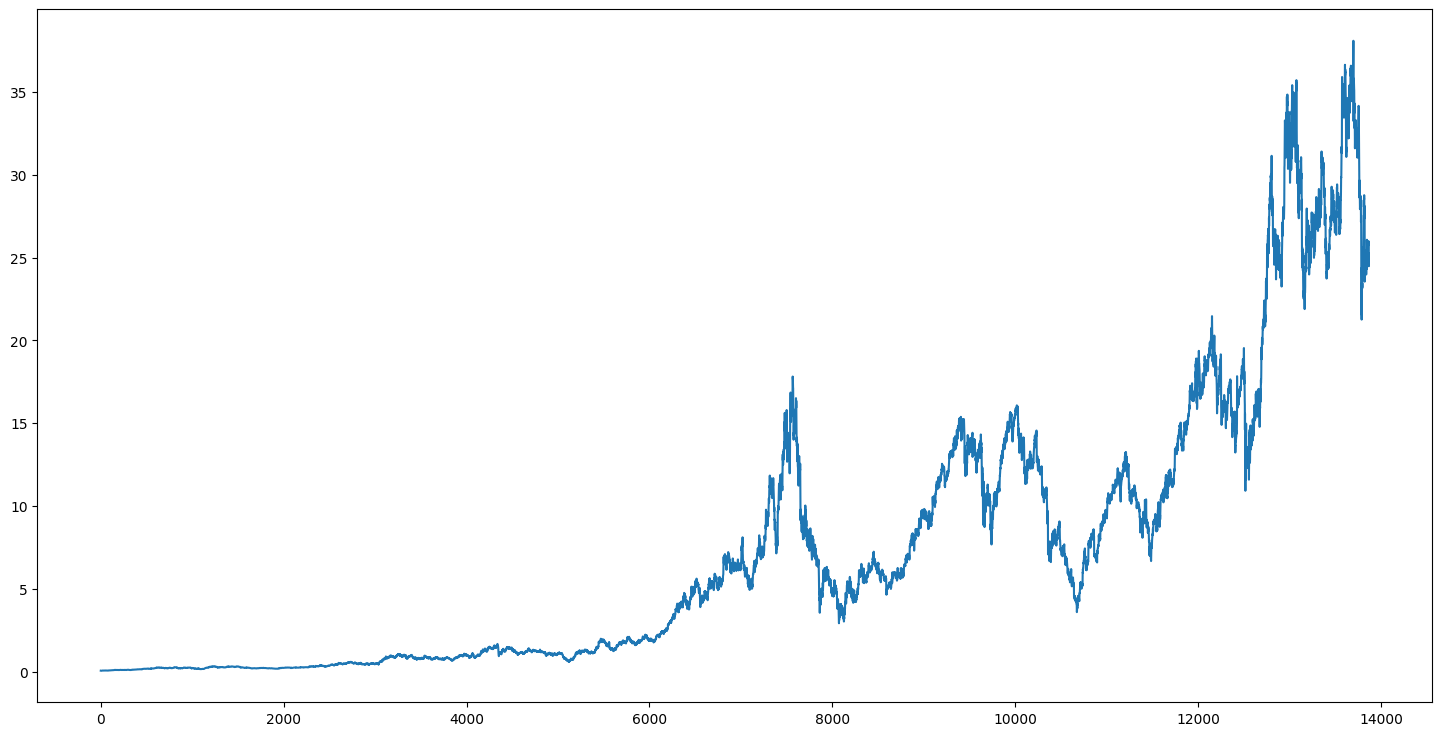

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])

In [76]:
D = data.iloc[:,1:2].values

In [77]:
D.shape

(13868, 1)

In [78]:
Tr_set = D[:11000]
Ts_set = D[11000:]

In [79]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [80]:
sc = MinMaxScaler(feature_range=(0,1))

In [81]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.transform(Ts_set)

In [82]:
seq_len = 30
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])
    y_train.append(Tr_scaled[i,0])

In [83]:
type(X_train)

list

In [84]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [85]:
X_train[0]

array([3.79125730e-04, 3.79126074e-04, 3.46156811e-04, 2.47257003e-04,
       1.48355134e-04, 0.00000000e+00, 1.64839491e-05, 1.07660016e-09,
       4.94498428e-05, 1.15386075e-04, 1.15386075e-04, 1.97803929e-04,
       3.79125730e-04, 6.09897764e-04, 7.25265884e-04, 9.23071302e-04,
       8.40651434e-04, 8.57138588e-04, 8.90103773e-04, 7.74718366e-04,
       6.59346776e-04, 6.92316292e-04, 7.41750602e-04, 7.58233541e-04,
       8.40652392e-04, 8.40652392e-04, 9.23073649e-04, 8.40652453e-04,
       6.59348218e-04, 7.58233541e-04])

In [86]:
len(X_train[0])

30

In [87]:
y_train[0]

np.float64(0.0007747181181782786)

In [88]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [89]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [90]:
X_train.shape

(10940, 30)

In [91]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [92]:
X_test.shape

(2808, 30)

In [93]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [95]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0079
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0013
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0012
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0010
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.2613e-04
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 8.6207e-04
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.7771e-04
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 7.8600e-04
Epoch 9/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7.0854e-04
Epoch 10/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 7.1946e-04


In [96]:
y_hat = model.predict(X_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [97]:
y_hat.shape

(2808, 1)

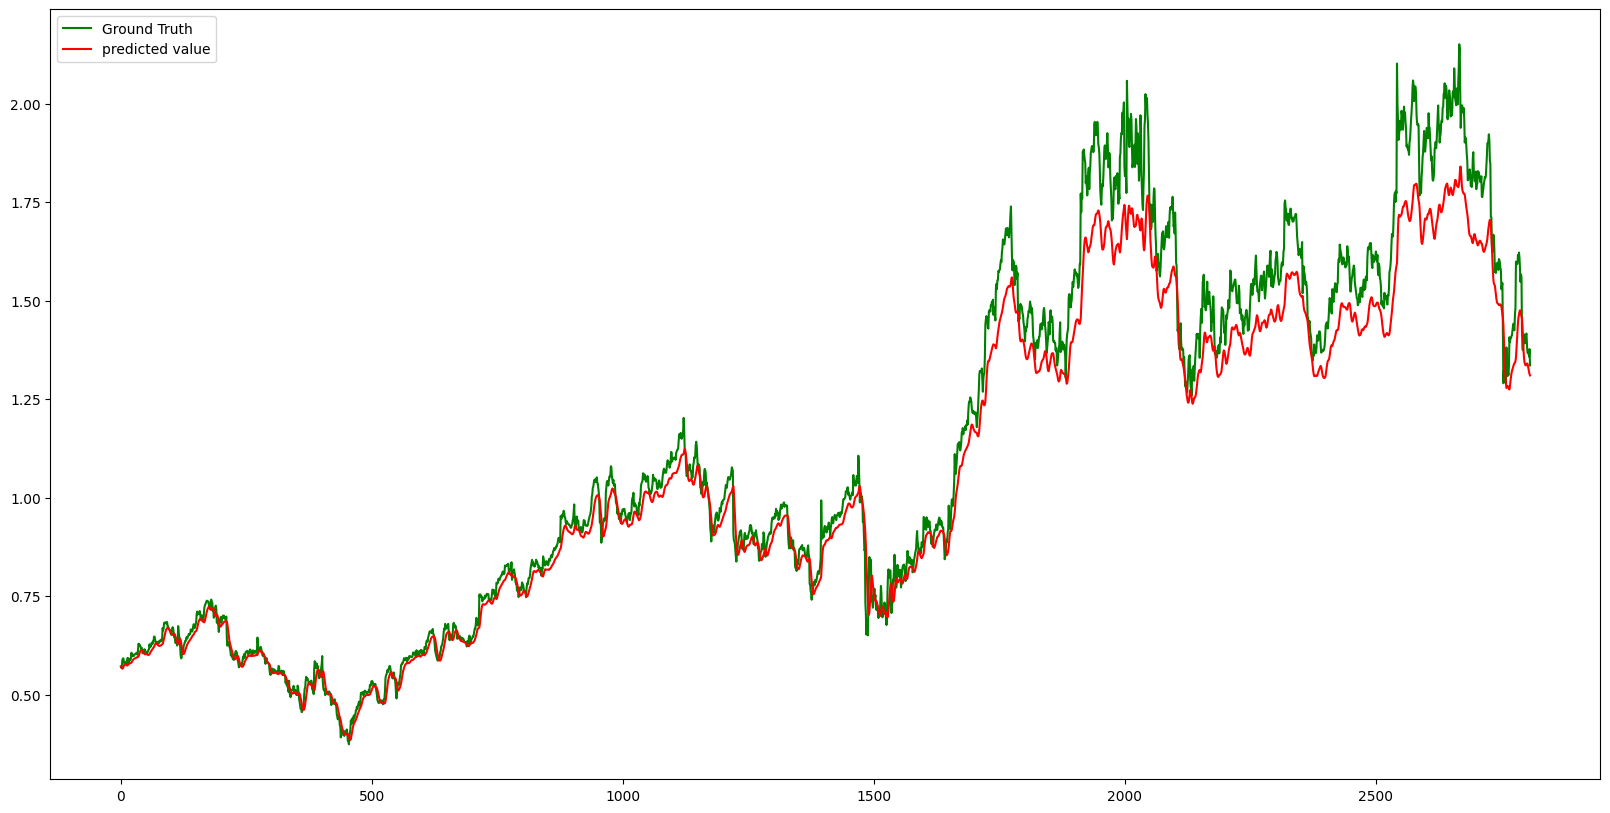

In [98]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Ground Truth')
plt.plot(y_hat,color='red',label='predicted value')
plt.legend()
plt.show()

In [99]:
model.save("stock_model.h5")